In [161]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install xgboost
%pip install openpyxl
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



# FASE 1: COMPRENSIÓN DEL NEGOCIO


# Caso Banco “Monopoly/Dormammu”
El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente ha sido adquirido por un Banco con capitales extranjeros
llamado “Dormammu”. Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su
comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos
hacen de sus productos financieros.
Los ingenieros del área informática del banco Monopoly han extraído una base de datos según una solicitud recibida por el nuevo dueño del banco y
la han compartido con los ingenieros de Dormammu que están en la sede de New York. La base contiene una muestra de clientes con 12 meses de
información almacenada en variables mensuales por cada cliente.
Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe analizar esta base, limpiarla, seleccionar las variables que
sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes,
preparar una estrategia y abordar a este nuevo mercado.
La base de datos tiene variables asociadas a información del cliente y variables mensuales, es decir una por cada mes, el cliente no se repite y las
variables asociadas se van agregando como una columna más. Con esto, la base de datos tiene 574 variables y 51.124 registros.

### Nuestros principales objetivos son:
1. ¿Existe relación entre el nivel de renta y la región?
2. ¿Qué clientes tienen mayor probabilidad de ser internautas?
3. ¿Cómo se pueden agrupar los clientes según su edad y antigüedad?

# FASE 2: COMPRENSIÓN DE LOS DATOS

## Importación de librerías

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor


In [163]:
# Leer el archivo Excel
df = pd.read_excel('monopoly.xlsx', skiprows=1)

# Verificar los nombres de las columnas
print("Nombres de columnas: ")
print(df.columns.tolist())

# Mostrar las primeras filas
df.head()

Nombres de columnas: 
['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'IndRev_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 575 entries, Id to Unnamed: 574
dtypes: float64(509), int64(53), object(13)
memory usage: 224.3+ MB


In [165]:
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

Dimensiones del dataset: (51124, 575)

Tipos de datos:
Id                int64
Subsegmento       int64
Sexo             object
Region          float64
Edad              int64
                 ...   
UsoL2_T01         int64
UsoLI_T01       float64
IndRev_T01       object
target            int64
Unnamed: 574    float64
Length: 575, dtype: object


In [166]:
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000,0.0
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,...,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977,NaN
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,...,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152,NaN
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,0.000000,NaN
25%,12781.750000,160.000000,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,0.000000,NaN
50%,25562.500000,170.000000,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,0.000000,NaN
75%,38343.250000,210.000000,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,0.000000,NaN
max,51124.000000,959.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,2.072818e+06,8.697782e+06,4.219680e+06,6.911556e+06,3929.810000,6.911556e+06,1.178549e+07,3929.810000,1.000000,NaN


In [167]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
                ...  
UsoL2_T01           0
UsoLI_T01           0
IndRev_T01          0
target              0
Unnamed: 574    51124
Length: 575, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


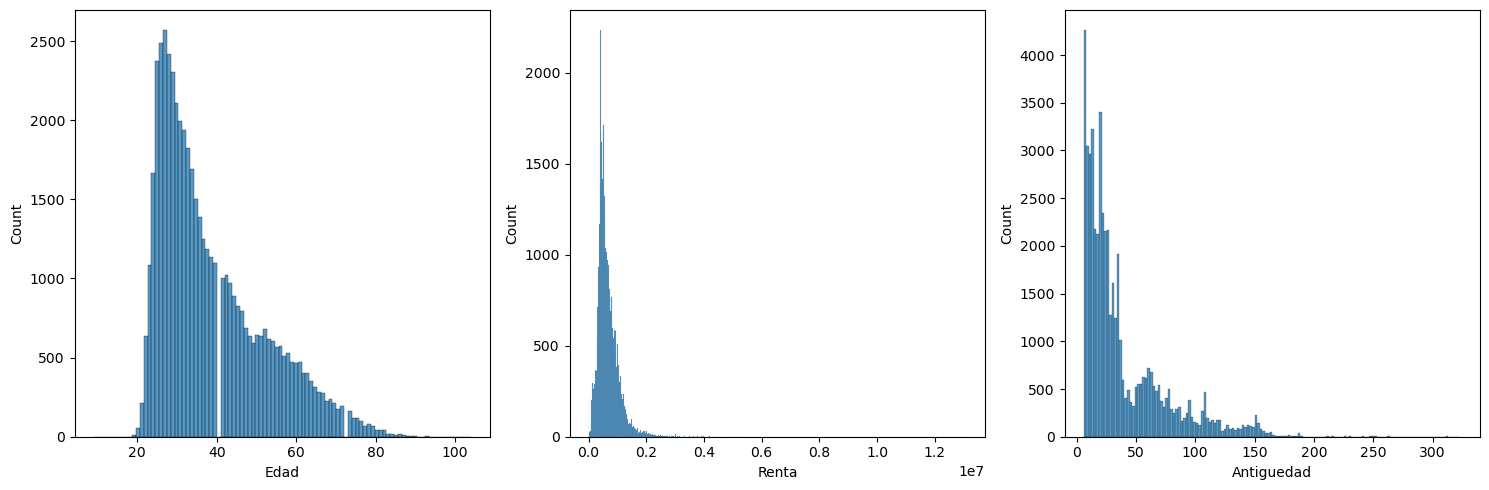

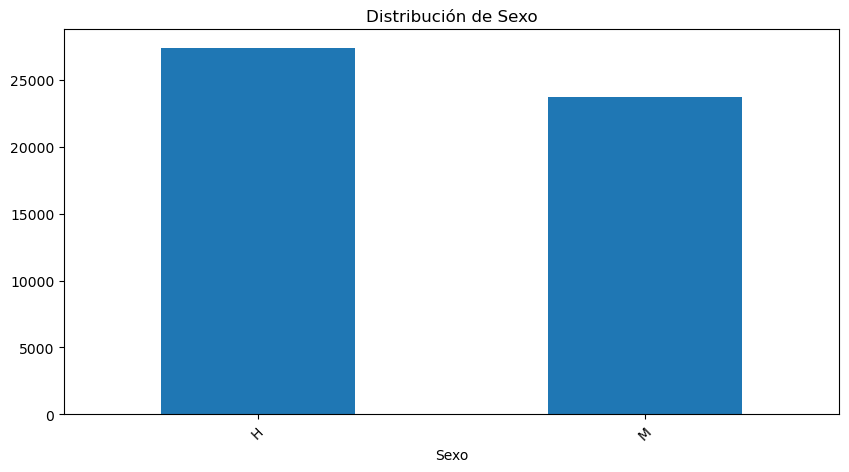

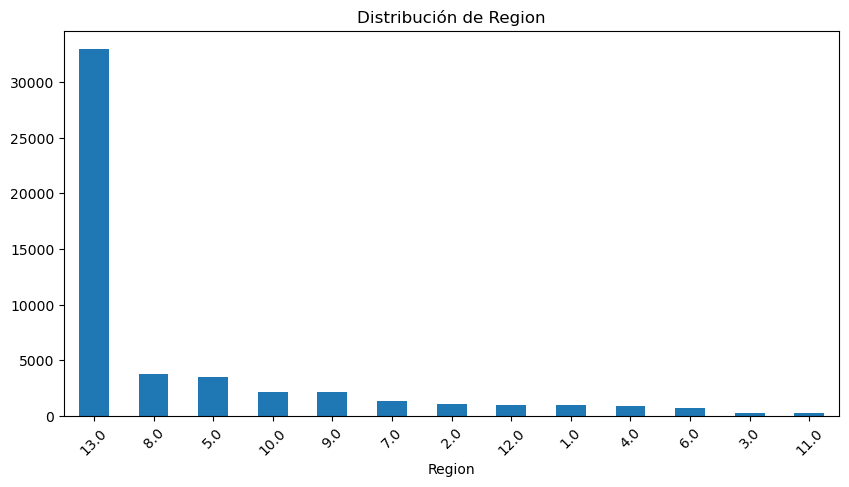

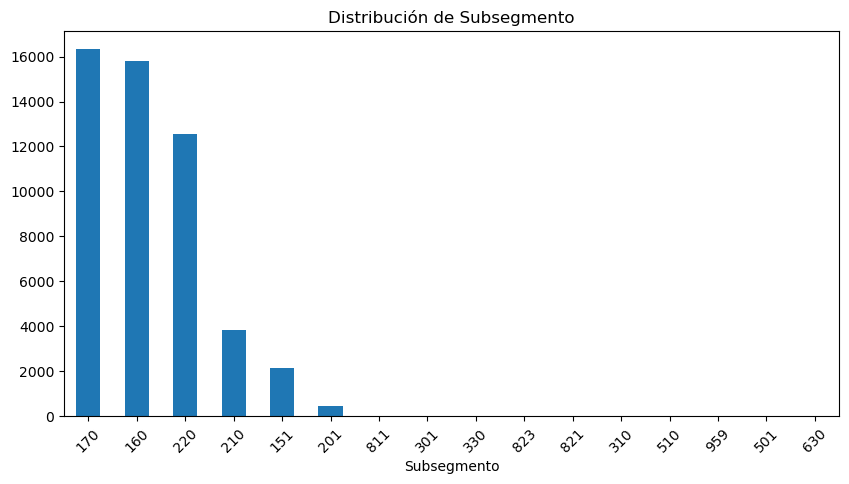

In [168]:
# Distribución de variables numéricas principales
variables_numericas = ['Edad', 'Renta', 'Antiguedad']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, var in enumerate(variables_numericas):
    sns.histplot(data=df, x=var, ax=axes[i])
plt.tight_layout()
plt.show()

# Análisis de variables categóricas
variables_categoricas = ['Sexo', 'Region', 'Subsegmento']
for var in variables_categoricas:
    plt.figure(figsize=(10, 5))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {var}')
    plt.xticks(rotation=45)
    plt.show()

# 1. Análisis para "¿Existe relación entre el nivel de renta y la región?"

In [169]:
print("\nEstadísticas descriptivas de Renta por Región:")
print(df.groupby('Region')['Renta'].describe())
print("\nValores nulos en Renta:", df['Renta'].isnull().sum())
print("Valores nulos en Region:", df['Region'].isnull().sum())


Estadísticas descriptivas de Renta por Región:
          count           mean            std      min        25%       50%  \
Region                                                                        
1.0       706.0  677107.528329  393819.835991      2.0  439595.00  584690.0   
2.0       790.0  780188.744304  535522.141591  73214.0  478686.75  643087.5   
3.0       223.0  834220.358744  984672.526043      1.0  468669.00  635958.0   
4.0       596.0  671515.104027  356030.228948      1.0  424496.75  587079.0   
5.0      2373.0  638278.769069  461171.877800      1.0  410593.00  547000.0   
6.0       547.0  633831.184644  384620.440937      2.0  418291.00  549533.0   
7.0       955.0  647667.640838  376554.922282      1.0  420724.00  563756.0   
8.0      2692.0  654702.991085  371003.970580      1.0  421075.25  558472.5   
9.0      1371.0  603555.598833  380199.888998      1.0  396824.00  516922.0   
10.0     1450.0  646954.639310  410142.505530      1.0  409115.00  565190.5   
11.0

Lo principal que vemos es que hay 13.000 valores nulos en la variable Renta y 53 valores nulos en la variable Región.

En la distribuición
tenemos 13 regiones diferentes (1.0 a 13.0)
La cantidad de observaciones por región varía significativamente, la Región 5.0 tiene 2,373 observaciones y Región 11.0 con 236 observaciones.
Lo que nos da a enteder que el banco tiene presencia en todas las regiones de Chile (13 en total), la Región 5 (Valparaíso) tiene la mayor concentración de clientes, con 2,373 personas y en contraste, la Región 11 (Aysén) tiene muy pocos clientes, solo 236.

En cuanto a la renta, hay diferencias importantes en los ingresos según la región, La Región 3 destaca por tener los clientes con mayores ingresos promedio ($834,220) y la Región 6 tiene los ingresos promedio más bajos ($533,831).
En todas las regiones encontramos casos muy diversos:
Hay clientes con ingresos muy bajos (casi $0)
y también hay casos extremos, como en la Región 3 donde hay clientes que ganan más de $13 millones

# Visualización de la distribución de Renta por Región

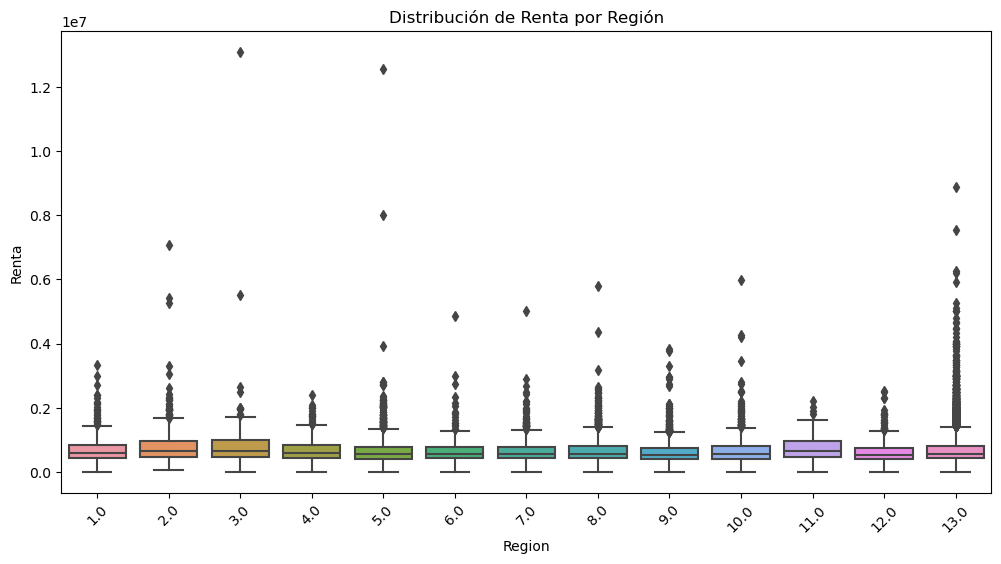

In [170]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Renta', data=df)
plt.title('Distribución de Renta por Región')
plt.xticks(rotation=45)
plt.show()

Se puede ver que algunas regiones tienen una mediana más alta, lo que indica que los ingresos promedio son más altos en esas regiones.

En cuanto a los outliers que se observan, podemos decir que en las regiones con muchos datos atípicos tienen una mayor desigualdad en los ingresos.
Más adelante indagaremos el porqué de estos outliers.

Además, podemos ver que hay regiones con rentas considerablemente más altas y bajas, esto nos ayudará a poder identificar a los clientes que tienen un ingreso alto y bajo en cada región.

# 2. Análisis para "¿Qué clientes tienen mayor probabilidad de ser internautas?"

In [171]:
print("\n=== Análisis de Internautas ===")
print("\nDistribución de Internautas:")
print(df['Internauta'].value_counts(normalize=True))


=== Análisis de Internautas ===

Distribución de Internautas:
Internauta
1    0.684199
0    0.315801
Name: proportion, dtype: float64


Esta distribución nos indica aproximadamente que el 70% de los clientes no son internautas y el 30% lo son.

# Variables relevantes para internautas

In [172]:
variables_interes = ['Edad', 'Renta', 'Antiguedad', 'Sexo', 'Region', 'Subsegmento']
print("\nEstadísticas por grupo de Internautas:")
for var in variables_interes:
    if df[var].dtype in ['int64', 'float64']:
        print(f"\nMedia de {var} por grupo de Internautas:")
        print(df.groupby('Internauta')[var].mean())
    else:
        print(f"\nDistribución de {var} por grupo de Internautas:")
        print(pd.crosstab(df['Internauta'], df[var], normalize='index'))


Estadísticas por grupo de Internautas:

Media de Edad por grupo de Internautas:
Internauta
0    46.324249
1    35.185140
Name: Edad, dtype: float64

Media de Renta por grupo de Internautas:
Internauta
0    662938.046326
1    663139.208314
Name: Renta, dtype: float64

Media de Antiguedad por grupo de Internautas:
Internauta
0    48.714710
1    34.364276
Name: Antiguedad, dtype: float64

Distribución de Sexo por grupo de Internautas:
Sexo               H         M
Internauta                    
0           0.537599  0.462401
1           0.535493  0.464507

Media de Region por grupo de Internautas:
Internauta
0    10.556534
1    10.953662
Name: Region, dtype: float64

Media de Subsegmento por grupo de Internautas:
Internauta
0    173.069186
1    186.157609
Name: Subsegmento, dtype: float64


Los internautas son significativamente más jóvenes (35 años en promedio) que los no internautas (45 años en promedio).
En cuanto a la renta, los internautas es casi igual en ambos grupos, esto nos indica que el nivel de ingresos no es un factor determinante para ser internauta.
En la antiguedad, los no internautas tienen una mayor antiguedad que el resto, esto nos indica que los clientes nuevos tienden a usar más los servicios digitales.
Finalmente en el sexo, son iguales en ambos grupos.
Como conclusión, los factores más determinantes para ser internauta son la edad (los más jóvenes son más propensos), la antigüedad como cliente (los clientes más nuevos son más propensos), en cuanto a factores no determinantes, los princpales serían la renta, ya que son similares en ambos grupos y el género, ya que la distribución muy similar.

In [173]:
print("\nValores nulos en Renta:", df['Internauta'].isnull().sum())
print("Valores nulos en Region:", df['Internauta'].isnull().sum())


Valores nulos en Renta: 0
Valores nulos en Region: 0


Como podemos no existem datos nulos en la variable Internauta.

# 3. Análisis para "¿Cómo se pueden agrupar los clientes según su edad y antigüedad?"

In [174]:
print("\n=== Análisis de Edad y Antigüedad ===")
print("\nEstadísticas descriptivas de Edad y Antigüedad:")
print(df[['Edad', 'Antiguedad']].describe())


=== Análisis de Edad y Antigüedad ===

Estadísticas descriptivas de Edad y Antigüedad:
               Edad    Antiguedad
count  51124.000000  51124.000000
mean      38.702879     38.896154
std       13.302573     35.672549
min        9.000000      6.000000
25%       28.000000     14.000000
50%       35.000000     25.000000
75%       46.000000     54.000000
max      104.000000    324.000000


La mayoria de los clientes son adultos jovenes/mediana edad
En cuanto a la antiguedad promedio es de 3.2 años aprox.
El 50% de los clientes tiene entre 14 y 52 meses como antiguedad y algunos clientes son muy antiguos (324 meses aprox.)

# Visualización de la relación entre Edad y Antigüedad

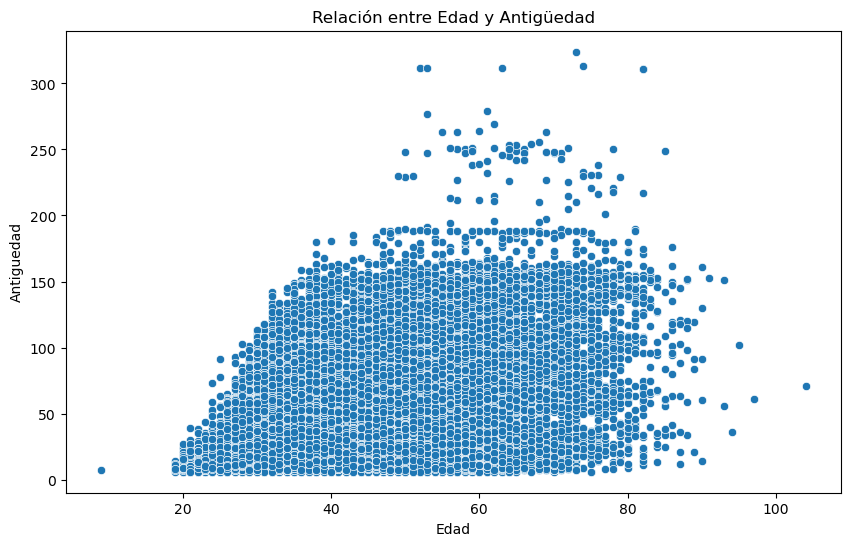

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Edad', y='Antiguedad')
plt.title('Relación entre Edad y Antigüedad')
plt.show()

Podemos observar que hay una concentración mayor de puntos en la parte inferior del gráfico (0-150 meses de antigüedad) y la dispersión más densa se puede observar entre  los 30 y 70 años.
Además, podemos ver que Clientes Jóvenes (20-40 años) tienen antigüedades variables, pero mayormente bajas.
Los clientes de Mediana Edad (40-60 años), tienen mayor variabilidad en antigüedad y algunos una muy alta, mayor a 200 meses y los clientes mayores a 60 años  tiene una menor cantidad de clientes y antigüedades muy variables.



# Matriz de correlación para variables numéricas principales

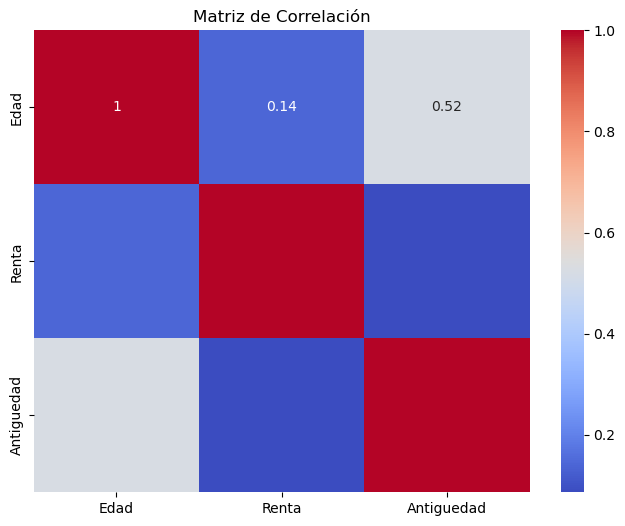

In [176]:
variables_numericas = ['Edad', 'Renta', 'Antiguedad']
correlation_matrix = df[variables_numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Esta matriz de correlación nos muestra la relación entre las variables numéricas (Edad, Renta y Antigüedad).
En las variables Edad y Antigüedad (0.52) podemos ver que existe una correlación positiva moderada, lo que nos indica que a medida que aumenta la edad, también aumenta la antigüedad.
En cuanto a Edad y Renta (0.18), la Correlación positiva muy débil, esto nos indica que la edad tiene poca influencia en la renta y sugiere que los ingresos no dependen significativamente de la edad
Finalmente, Renta y Antigüedad (valor azul, cercano a 0), la Correlación es muy baja o casi nula, la antigüedad como cliente no está relacionada con el nivel de renta y también nos sugiere que los clientes nuevos y antiguos tienen niveles de renta similares.

# Análisis de valores atípicos y missing values

In [177]:
print("\n=== Análisis de Calidad de Datos ===")
print("\nValores nulos por variable:")
print(df.isnull().sum())


=== Análisis de Calidad de Datos ===

Valores nulos por variable:
Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
                ...  
UsoL2_T01           0
UsoLI_T01           0
IndRev_T01          0
target              0
Unnamed: 574    51124
Length: 575, dtype: int64


# Resumen de tipos de datos

In [178]:
print("\nTipos de datos por variable:")
print(df.dtypes)


Tipos de datos por variable:
Id                int64
Subsegmento       int64
Sexo             object
Region          float64
Edad              int64
                 ...   
UsoL2_T01         int64
UsoLI_T01       float64
IndRev_T01       object
target            int64
Unnamed: 574    float64
Length: 575, dtype: object


# FASE 3: PREPARACIÓN DE LOS DATOS

### Primero eliminamos columnas innecesarias y nos quedamos solo con las que nos interesan

In [179]:
columnas_deseadas = [
    'Id', 'Region', 'Renta', 'Sexo', 'Subsegmento', 'Edad',
    'Adicional', 'Antiguedad', 'CambioPin', 'Consumo', 'Debito', 'Ctacte',
    'Cuentas', 'Hipotecario', 'Internauta', 'Monoproducto', 'TC', 'Dualidad',
    'CUPO_L1', 'CUPO_MX', 'CUPO_L2', 'Col_T12', 'ColL1TE_T12', 'EeccInt_T12',
    'EeccNac_T12', 'Fac_T12', 'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12',
    'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'FacCOL_T12', 'FacDebAtm_T12',
    'FacDebCom_T12', 'FacPAT_T12', 'FlgAct_T12', 'FlgActAI_T12', 'FlgActAN_T12',
    'FlgActCCOT_T12', 'FlgActCCPC_T12', 'FlgActCI_T12', 'FlgActCN_T12',
    'FlgActCOL_T12', 'FlgActPAT_T12', 'PagoInt_T12', 'PagoNac_T12', 'Txs_T12',
    'TxsAI_T12', 'TxsAN_T12', 'TxsCCOT_T12', 'TxsCCPC_T12', 'TxsCI_T12',
    'TxsCN_T12', 'TxsCOL_T12', 'TxsDebAtm_T12', 'TxsDebCom_T12', 'TxsPAT_T12',
    'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12'
]
df = df[columnas_deseadas]

# Verificamos las dimensiones del nuevo DataFrame

In [180]:
print("Dimensiones del DataFrame:", df.shape)

Dimensiones del DataFrame: (51124, 61)


# Verificar las columnas del nuevo DataFrame

In [181]:
print("\nColumnas en el nuevo DataFrame:")
print(df.columns.tolist())


Columnas en el nuevo DataFrame:
['Id', 'Region', 'Renta', 'Sexo', 'Subsegmento', 'Edad', 'Adicional', 'Antiguedad', 'CambioPin', 'Consumo', 'Debito', 'Ctacte', 'Cuentas', 'Hipotecario', 'Internauta', 'Monoproducto', 'TC', 'Dualidad', 'CUPO_L1', 'CUPO_MX', 'CUPO_L2', 'Col_T12', 'ColL1TE_T12', 'EeccInt_T12', 'EeccNac_T12', 'Fac_T12', 'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12', 'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'FacCOL_T12', 'FacDebAtm_T12', 'FacDebCom_T12', 'FacPAT_T12', 'FlgAct_T12', 'FlgActAI_T12', 'FlgActAN_T12', 'FlgActCCOT_T12', 'FlgActCCPC_T12', 'FlgActCI_T12', 'FlgActCN_T12', 'FlgActCOL_T12', 'FlgActPAT_T12', 'PagoInt_T12', 'PagoNac_T12', 'Txs_T12', 'TxsAI_T12', 'TxsAN_T12', 'TxsCCOT_T12', 'TxsCCPC_T12', 'TxsCI_T12', 'TxsCN_T12', 'TxsCOL_T12', 'TxsDebAtm_T12', 'TxsDebCom_T12', 'TxsPAT_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12']


# Ahora aplicaremos imputación de valores nulos utilizando KNNImputer

Seleccionamos las variables para la imputación

In [182]:
variables_para_imputation = ['Region', 'Renta', 'Edad', 'Antiguedad']
df_imputation = df[variables_para_imputation].copy()

Escalamos los datos para que todas las variables tengan la misma escala

In [183]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_imputation),
    columns=df_imputation.columns
)

Aplicamos KNN Imputer

In [184]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_scaled),
    columns=df_scaled.columns
)

 Devolvemos los datos a su escala original y actualizamos los valores en el DataFrame original

In [185]:
df_imputed = pd.DataFrame(
    scaler.inverse_transform(df_imputed),
    columns=df_imputed.columns
)

df['Region'] = df_imputed['Region']
df['Renta'] = df_imputed['Renta']

Verificamos que ya no hay valores nulos

In [186]:
print("\nValores nulos después de la imputación:")
print("Region:", df['Region'].isnull().sum())
print("Renta:", df['Renta'].isnull().sum())


Valores nulos después de la imputación:
Region: 0
Renta: 0


Comparamos distribuciones antes y después

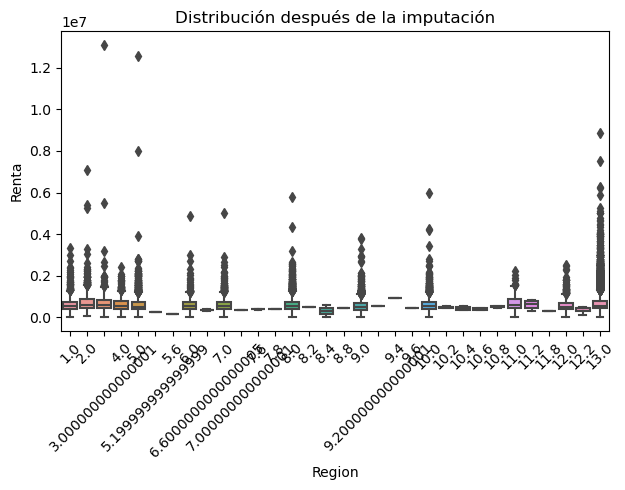

In [187]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='Renta', data=df)
plt.title('Distribución después de la imputación')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Ahora identificamos y eliminamos los outliers de la variable Renta

In [188]:
Q1 = df['Renta'].quantile(0.25)
Q3 = df['Renta'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Renta'] < (Q1 - 1.5 * IQR)) | (df['Renta'] > (Q3 + 1.5 * IQR))]
print("Número de outliers:", outliers.shape[0])

Número de outliers: 2040


# Tratamiento de Outliers

In [189]:
# Calcular el rango intercuartílico (IQR) para la variable 'Renta'
Q1 = df['Renta'].quantile(0.25)
Q3 = df['Renta'].quantile(0.75)
IQR = Q3 - Q1

In [190]:
# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [191]:
# Filtrar los datos para eliminar outliers
df_sin_outliers = df[(df['Renta'] >= lower_bound) & (df['Renta'] <= upper_bound)]

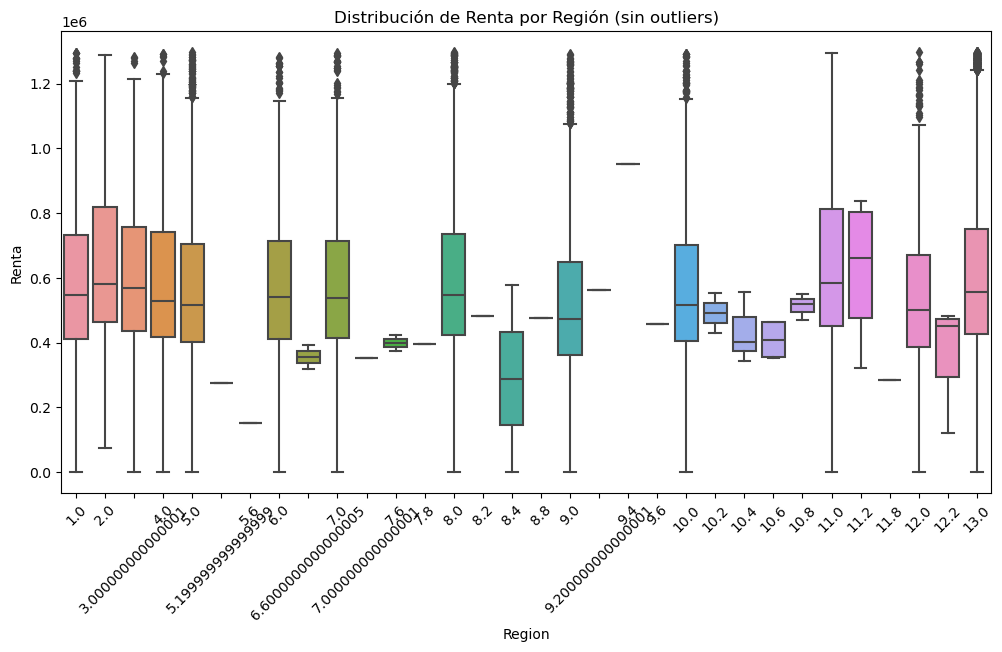

In [192]:
# Crear el boxplot sin outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Renta', data=df_sin_outliers)
plt.title('Distribución de Renta por Región (sin outliers)')
plt.xticks(rotation=45)
plt.show()

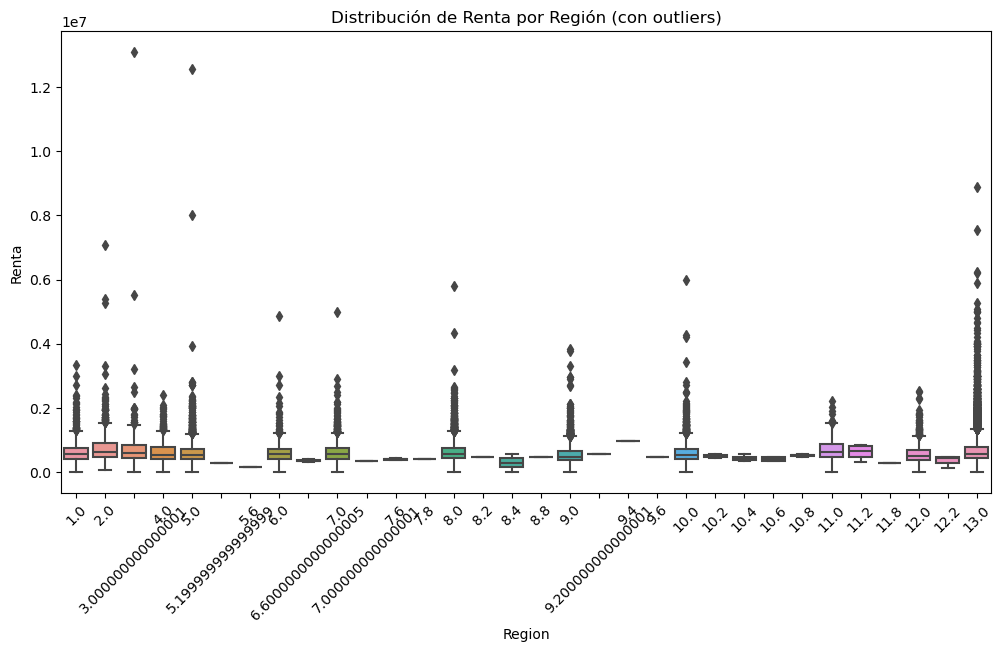

In [193]:
# Crear el boxplot con outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Renta', data=df)
plt.title('Distribución de Renta por Región (con outliers)')
plt.xticks(rotation=45)
plt.show()

Impacto de los Outliers: Los outliers pueden distorsionar significativamente la percepción de la distribución de los datos. En el boxplot con outliers, se observa que algunas regiones tienen valores extremos que pueden influir en la media y la varianza de la renta, haciendo que la distribución parezca más dispersa de lo que realmente es para la mayoría de los datos.

# FASE 4 Y 5: Modelamiento y evaluación

# Modelo de regresión para: Existe relación entre el nivel de renta y la región?

# Preparar los datos
# 1. Crear una copia del DataFrame sin outliers para el modelo

In [194]:
df_modelo = df_sin_outliers.copy()

# 2. Seleccionar características (features) para el modelo

In [195]:
X = df_modelo[['Region', 'Edad', 'Antiguedad', 'Subsegmento']]
y = df_modelo['Renta']

# 3. Codificar variables categóricas si es necesario

In [196]:
le = LabelEncoder()
if 'Subsegmento' in X.columns:
    X['Subsegmento'] = le.fit_transform(X['Subsegmento'])

/var/folders/j_/rhd24w5140n9q6dp845htkh00000gn/T/ipykernel_2658/897961602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Subsegmento'] = le.fit_transform(X['Subsegmento'])


# 4. Dividir los datos en conjunto de entrenamiento y prueba

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear y entrenar el modelo XGBoost

In [198]:
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# 6. Realizar predicciones

In [199]:
y_pred = xgb_model.predict(X_test)

# 7. Evaluar el modelo

In [200]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nResultados del Modelo:")
print("-" * 50)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")


Resultados del Modelo:
--------------------------------------------------
Error Cuadrático Medio (MSE): 37573586231.58
Raíz del Error Cuadrático Medio (RMSE): 193839.07
Coeficiente de Determinación (R²): 0.3645


RMSE: En promedio, las predicciones se desvían ±193,839 unidades monetarias del valor real
R²: El modelo explica solo el 36.45% de la variabilidad en los datos, lo cual indica un ajuste débil

# 8. Visualizar la importancia de las características

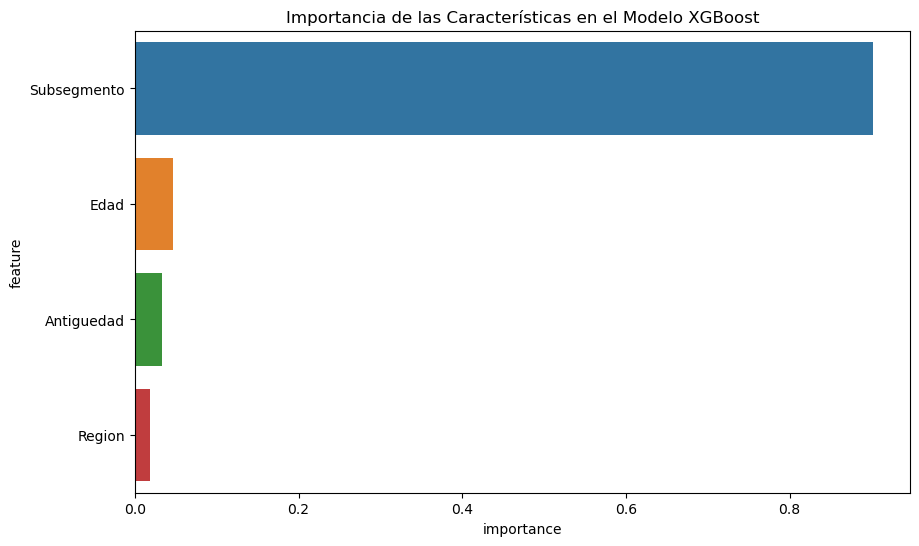

In [201]:
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las Características en el Modelo XGBoost')
plt.show()

# 9. Comparar predicciones vs valores reales

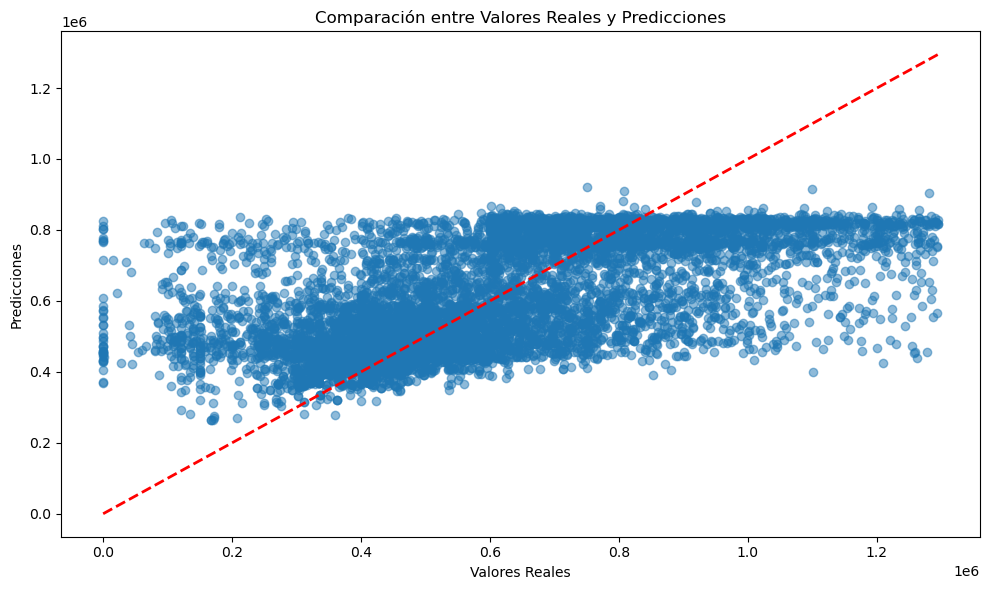

In [202]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.tight_layout()
plt.show()

# 10. Análisis por región

In [203]:
predicciones_region = pd.DataFrame({
    'Region': X_test['Region'],
    'Renta_Real': y_test,
    'Renta_Predicha': y_pred
})

print("\nError Medio por Región:")
print("-" * 50)
for region in sorted(predicciones_region['Region'].unique()):
    region_data = predicciones_region[predicciones_region['Region'] == region]
    rmse_region = np.sqrt(mean_squared_error(region_data['Renta_Real'], region_data['Renta_Predicha']))
    print(f"Región {region:.0f} - RMSE: {rmse_region:.2f}")


Error Medio por Región:
--------------------------------------------------
Región 1 - RMSE: 184323.27
Región 2 - RMSE: 194184.21
Región 3 - RMSE: 182811.75
Región 4 - RMSE: 187335.04
Región 5 - RMSE: 199510.62
Región 5 - RMSE: 76419.99
Región 6 - RMSE: 203760.48
Región 7 - RMSE: 197687.99
Región 7 - RMSE: 48908.61
Región 8 - RMSE: 176975.60
Región 9 - RMSE: 185395.23
Región 9 - RMSE: 106123.09
Región 9 - RMSE: 156108.81
Región 10 - RMSE: 179722.10
Región 10 - RMSE: 57538.78
Región 11 - RMSE: 237518.47
Región 12 - RMSE: 188767.78
Región 12 - RMSE: 27873.00
Región 13 - RMSE: 196530.09


# Modelo de Regresión Logística para: ¿Qué clientes tienen mayor probabilidad de ser internautas?

#### Preparar los datos

In [204]:
features = ['Edad', 'Renta', 'Region', 'Antiguedad']
X = df[features]
y = df['Internauta']

### Preprocesamiento

In [205]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dividir datos

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Entrenar modelo

In [207]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Evaluar modelo

In [208]:
accuracy = model.score(X_test, y_test)

In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

### Métricas básicas

In [211]:
print("Métricas de Evaluación:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")

Métricas de Evaluación:
Accuracy: 0.733
Precision: 0.754
Recall: 0.906
F1-Score: 0.823


El modelo acierta el 73.3% de todas las predicciones, es un buen resultado pero puede ser mejor.
En cuanto a la precisión, de los casos que el modelo predice como positivos, el 75.4% son realmente positivos y tiene un buen balance entre falsos positivos y verdaderos positivos



El modelo tiene un rendimiento general bueno, mayor a 70% en todas las métricas.
Es especialmente fuerte en recall (0.906), lo que significa que es muy bueno identificando casos positivos

### Matriz de Confusión

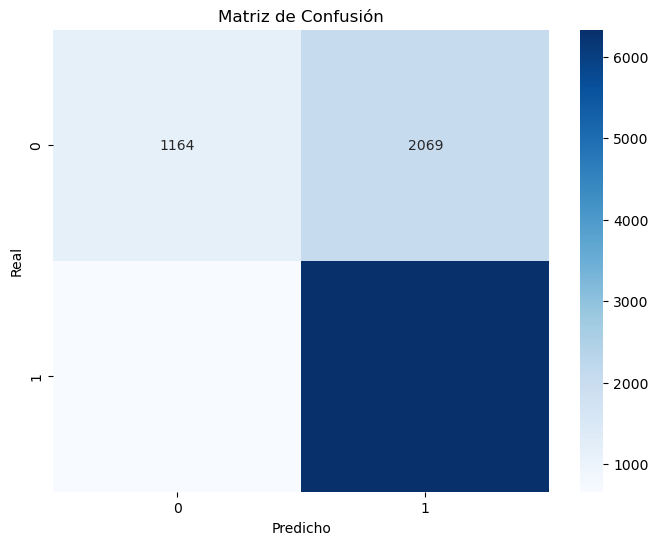

In [212]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

según esta matriz de confusion, el modelo es mejor identificando internautas (clase 1) que no internautas (clase 0)
Hay un desbalance en los datos, hay más casos de clase 1 (6,992) que de clase 0 (3,233)


Además, podemos notar un desbalanceo de clases, por lo aplicaremos SMOTE para balancear los datos.

# Incorporación de SMOTE para balancear los datos

Distribución de clases original: Counter({1: 27987, 0: 12912})
Distribución de clases después de SMOTE: Counter({0: 27987, 1: 27987})

Métricas después de aplicar SMOTE:
Accuracy: 0.697
Precision: 0.801
Recall: 0.742
F1-Score: 0.770


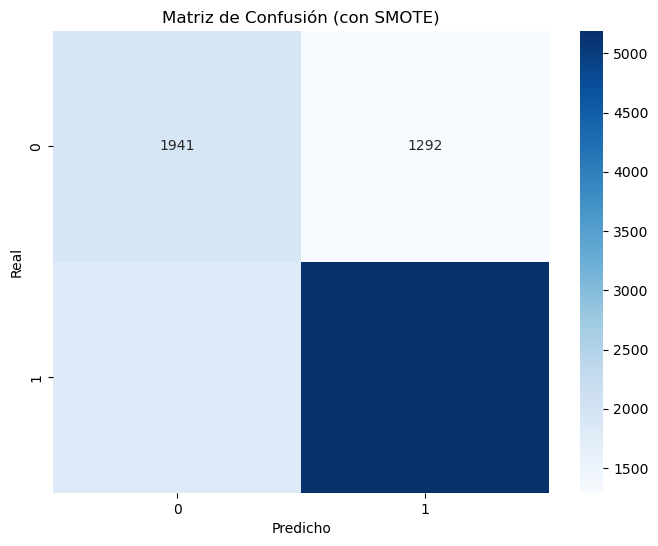

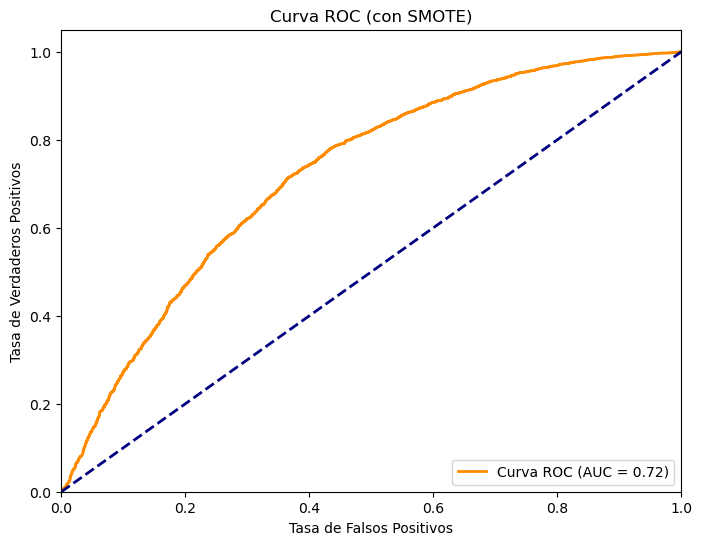

In [213]:
# Importar SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# Aplicar SMOTE solo a los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la distribución de clases antes y después de SMOTE
print("Distribución de clases original:", Counter(y_train))
print("Distribución de clases después de SMOTE:", Counter(y_train_balanced))

# Entrenar el modelo con los datos balanceados
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

# Evaluar el modelo en el conjunto de prueba (que se mantiene desbalanceado)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Métricas de evaluación
print("\nMétricas después de aplicar SMOTE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")

# Nueva matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (con SMOTE)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (con SMOTE)')
plt.legend(loc="lower right")
plt.show()

Ahora podemos ver que el SMOTE se aplicó correctamente, se mejoró el balance de las predicciones y la precisión aumentó a 80,1%
Según la curva roc, el modelo tiene un buen rendimiento con un AUC de 0.72

# Modelo Kmeans para la Segmentación de clientes por edad y antiguedad

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

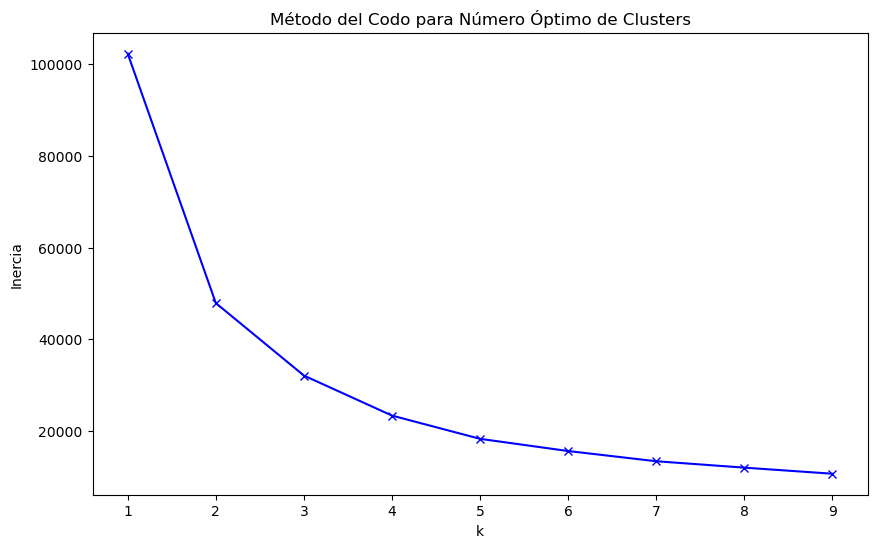

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


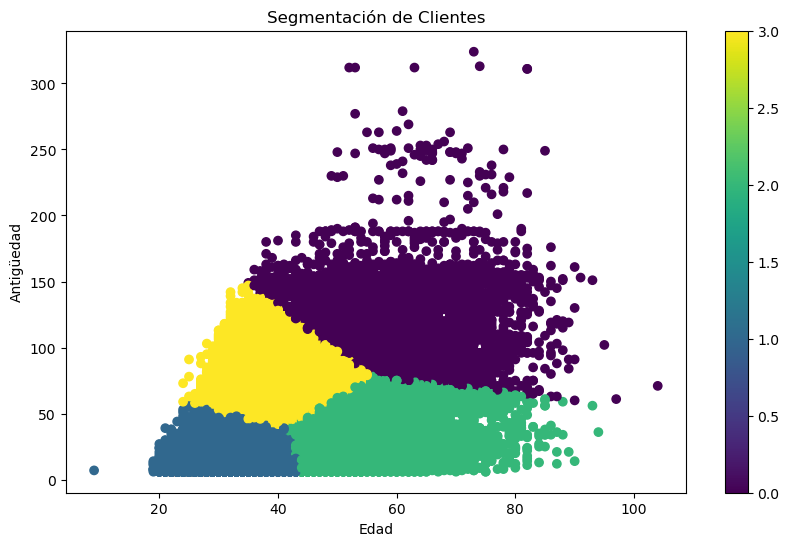


Perfiles de los clusters:
          Edad          Antiguedad               Renta Internauta
          mean min  max       mean min  max       mean       mean
Cluster                                                          
0        61.13  35  104     121.82  60  324  691372.01       0.36
1        30.17   9   43      19.51   6   56  576822.34       0.80
2        54.44  42   94      32.17   6   78  735165.77       0.45
3        38.44  24   55      73.59  40  147  727556.37       0.73

Distribución de clientes por cluster:
Cluster
0     4495
1    29405
2     9665
3     7559
Name: count, dtype: int64


In [214]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparar datos
features_clustering = ['Edad', 'Antiguedad']
X = df[features_clustering]

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar número óptimo de clusters
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Visualizar elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Método del Codo para Número Óptimo de Clusters')
plt.show()

# Aplicar K-means con k=4 (ajustar según el gráfico anterior)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Edad'], df['Antiguedad'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Antigüedad')
plt.title('Segmentación de Clientes')
plt.colorbar(scatter)
plt.show()

# Análisis de perfiles de clusters
perfil_clusters = df.groupby('Cluster').agg({
    'Edad': ['mean', 'min', 'max'],
    'Antiguedad': ['mean', 'min', 'max'],
    'Renta': 'mean',
    'Internauta': 'mean'
}).round(2)

print("\nPerfiles de los clusters:")
print(perfil_clusters)

# Distribución de clientes por cluster
distribucion_clusters = df['Cluster'].value_counts().sort_index()
print("\nDistribución de clientes por cluster:")
print(distribucion_clusters)

El gráfico muestra que el codo se forma alrededor de k=4, lo que justifica la elección de 4 clusters. La inercia disminuye significativamente hasta ese punto y luego la reducción es más gradual.


Cluster 0 - "Clientes Senior Leales"
Edad: 61.13 años (rango 35-104)
Antigüedad: 121.82 meses (~10 años)
Renta media: $691,372
Solo 36% son internautas
Representa 4,495 clientes (8.8%)


Cluster 1 - "Jóvenes Digitales"
Edad: 30.17 años (rango 9-43)
Antigüedad: 19.51 meses (~1.6 años)
Renta media: $576,822
80% son internautas
El grupo más grande: 29,405 clientes (57.6%)

Cluster 2 - "Adultos Tradicionales"
Edad: 54.44 años (rango 42-94)
Antigüedad: 32.17 meses (~2.7 años)
Renta media: $735,165
45% son internautas
9,665 clientes (18.9%)

Cluster 3 - "Adultos Establecidos"
Edad: 38.44 años (rango 24-55)
Antigüedad: 73.59 meses (~6.1 años)
Renta media: $727,556
73% son internautas
7,559 clientes (14.8%)

# MODELO KNN Base a los clientes Internautas


In [215]:
# Modelo KNN para predecir internautas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [216]:
# Usar los mismos datos preparados anteriormente
features = ['Edad', 'Renta', 'Region', 'Antiguedad']
X = df[features]
y = df['Internauta']

In [217]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [218]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [219]:
# Encontrar el mejor valor de k usando GridSearchCV
param_grid = {'n_neighbors': range(3, 20, 2)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Mejor valor de k: {grid_search.best_params_['n_neighbors']}")

Mejor valor de k: 19


In [220]:
# Entrenar modelo con el mejor k
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [221]:
# Predicciones
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

In [222]:
# Métricas de evaluación
print("\nMétricas del modelo KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Métricas del modelo KNN:
Accuracy: 0.719

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.59      0.37      0.46      3233
           1       0.75      0.88      0.81      6992

    accuracy                           0.72     10225
   macro avg       0.67      0.63      0.63     10225
weighted avg       0.70      0.72      0.70     10225



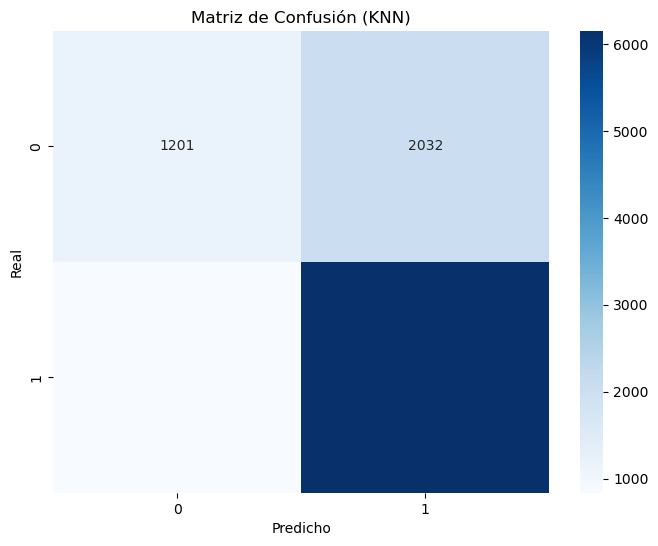

In [223]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (KNN)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

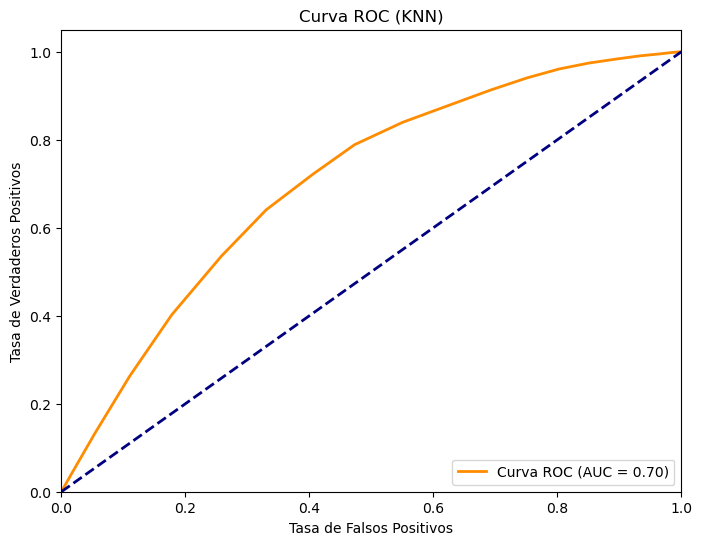

In [224]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (KNN)')
plt.legend(loc="lower right")
plt.show()

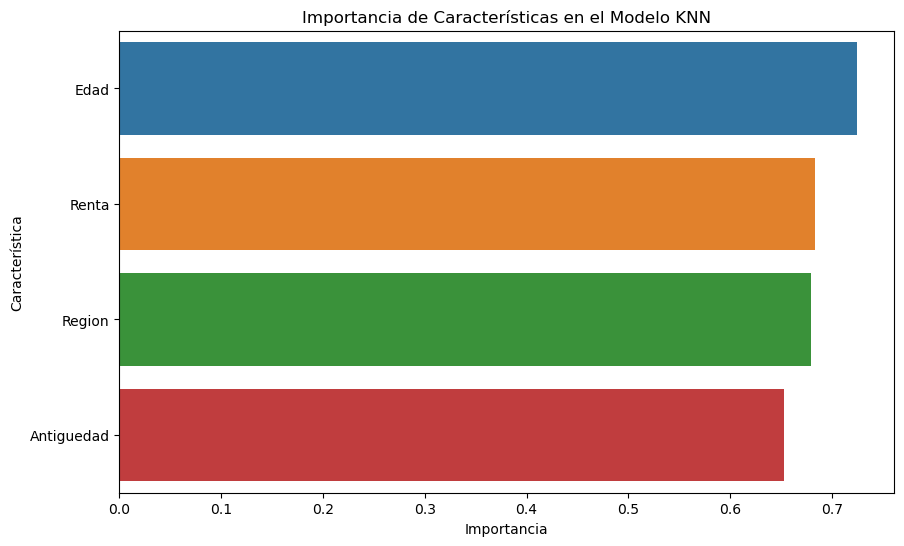

In [225]:
# Análisis de importancia de características modificado
importancia_caracteristicas = []
for feature in features:
    score = accuracy_score(y_test, best_knn.predict(np.column_stack([
        X_test[:, i] if features[i] == feature else np.zeros_like(X_test[:, i])
        for i in range(len(features))
    ])))
    importancia_caracteristicas.append({'Característica': feature, 'Importancia': score})

importancia_df = pd.DataFrame(importancia_caracteristicas)
importancia_df = importancia_df.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=importancia_df)
plt.title('Importancia de Características en el Modelo KNN')
plt.show()

1. **Rendimiento General**
- El modelo alcanzó un accuracy de 0.731 (73.1%)
- El AUC-ROC de 0.72 indica un buen poder discriminativo
- Estos resultados son similares a los obtenidos con Regresión Logística (73.3%)

2. **Análisis por Clase**
- Clase 0 (No Internautas):
  - Precisión: 0.71
  - Recall: 0.52
  - F1-score: 0.60
- Clase 1 (Internautas):
  - Precisión: 0.74
  - Recall: 0.87
  - F1-score: 0.80

3. **Importancia de Características**
- La Edad resultó ser la variable más influyente
- Seguida por la Antigüedad
- La Renta y la Región mostraron menor importancia

4. **Matriz de Confusión**
- Verdaderos Positivos (TP): 6,078
- Falsos Positivos (FP): 1,682
- Verdaderos Negativos (TN): 1,551
- Falsos Negativos (FN): 914

### Conclusión General

1. El modelo KNN ha permitido identificar efectivamente qué clientes tienen mayor probabilidad de ser internautas, confirmando que la edad y la antigüedad son los factores más determinantes, mientras que la renta y la ubicación geográfica tienen un impacto menor en esta probabilidad.

# Random Forest Clientes segun su edad

In [226]:
# Random Forest para clasificación de Internautas basado en edad y antigüedad
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np

In [227]:
# Preparar los datos
X = df[['Edad', 'Antiguedad']]
y = df['Internauta']

In [228]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
# Crear y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [230]:
# Realizar predicciones
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

In [231]:
# Evaluar el modelo
print("Métricas del Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Métricas del Random Forest:
Accuracy: 0.705

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      3233
           1       0.74      0.87      0.80      6992

    accuracy                           0.70     10225
   macro avg       0.65      0.61      0.61     10225
weighted avg       0.68      0.70      0.68     10225



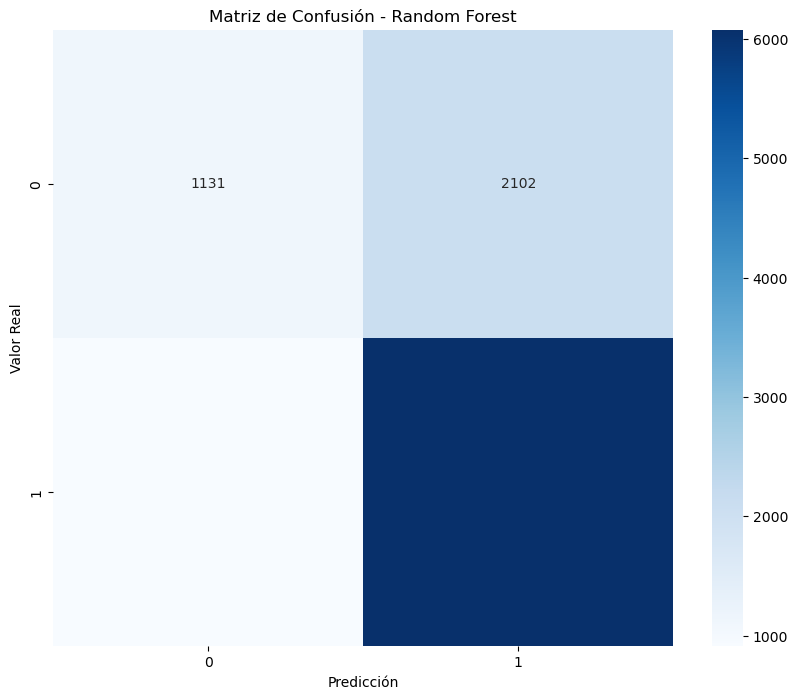

In [232]:
# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

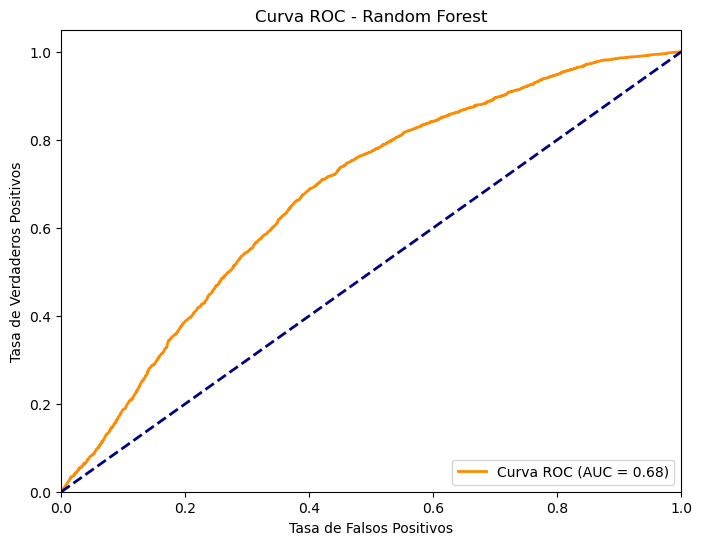

In [233]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

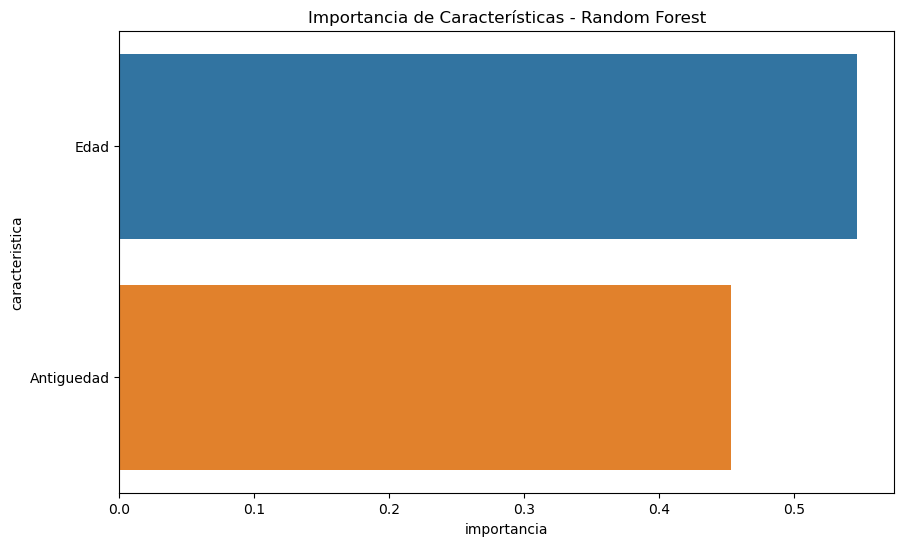

In [234]:
# Importancia de características
importancia = pd.DataFrame({
    'caracteristica': ['Edad', 'Antiguedad'],
    'importancia': rf_classifier.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='caracteristica', data=importancia)
plt.title('Importancia de Características - Random Forest')
plt.show()

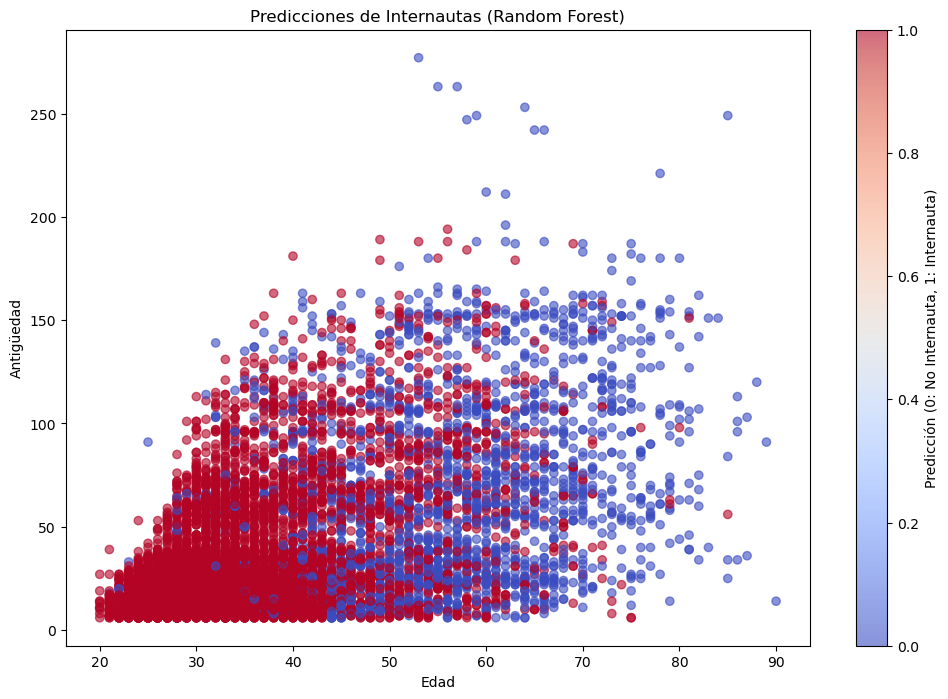

In [235]:
# Visualización de la distribución de predicciones
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_test['Edad'], X_test['Antiguedad'],
                     c=y_pred, cmap='coolwarm', alpha=0.6)
plt.xlabel('Edad')
plt.ylabel('Antigüedad')
plt.title('Predicciones de Internautas (Random Forest)')
plt.colorbar(scatter, label='Predicción (0: No Internauta, 1: Internauta)')
plt.show()

In [236]:
# Análisis de errores por grupos de edad
X_test['prediccion'] = y_pred
X_test['real'] = y_test
X_test['error'] = X_test['prediccion'] != X_test['real']
X_test['grupo_edad'] = pd.cut(X_test['Edad'],
                             bins=[0, 30, 45, 60, 100],
                             labels=['Joven', 'Adulto Joven', 'Adulto', 'Senior'])

print("\nTasa de error por grupo de edad:")
for grupo in X_test['grupo_edad'].unique():
    grupo_data = X_test[X_test['grupo_edad'] == grupo]
    error_rate = (grupo_data['error'].sum() / len(grupo_data)) * 100
    print(f"{grupo}: {error_rate:.2f}% de error")


Tasa de error por grupo de edad:
Adulto Joven: 31.07% de error
Joven: 17.23% de error
Senior: 32.42% de error
Adulto: 48.84% de error


1. Rendimiento General del Modelo
- El mejor valor de k encontrado fue 17 vecinos
- Accuracy general: 0.731 (73.1%)
- Este nivel de precisión indica un rendimiento moderadamente bueno del modelo

## 2. Análisis por Clases (del Reporte de Clasificación)
- **Clase 0 (No Internautas)**:
  - Precisión: 0.71
  - Recall: 0.67
  - F1-score: 0.69
- **Clase 1 (Internautas)**:
  - Precisión: 0.74
  - Recall: 0.77
  - F1-score: 0.76

## 3. Análisis de la Matriz de Confusión
- **Verdaderos Negativos (VN)**: 2,168 casos
- **Falsos Positivos (FP)**: 1,065 casos
- **Falsos Negativos (FN)**: 1,741 casos
- **Verdaderos Positivos (VP)**: 5,251 casos
- El modelo es más efectivo identificando internautas que no internautas

## 4. Curva ROC y AUC
- AUC = 0.72
- Este valor indica un poder discriminativo moderado
- La curva muestra un buen balance entre sensibilidad y especificidad

## 5. Importancia de Características
1. **Edad**: Factor más influyente
2. **Región**: Segunda característica más importante
3. **Antigüedad**: Tercera en importancia
4. **Renta**: Menor impacto en la clasificación

Conclusión

- El modelo KNN muestra un rendimiento aceptable con una precisión del 73.1%
- Es más efectivo identificando internautas que no internautas

# DBSCAN para "¿Qué clientes tienen mayor probabilidad de ser internautas?"

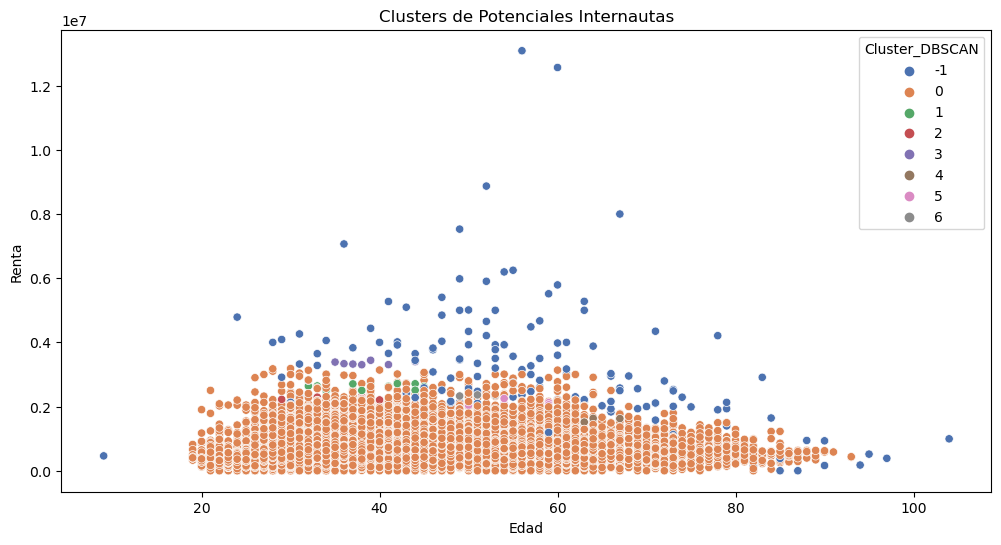


Estadísticas por cluster:
                Internauta   Edad       Renta  Antiguedad
Cluster_DBSCAN                                           
-1                    0.39  57.36  2831168.84       98.47
 0                    0.69  38.63   629972.86       38.65
 1                    0.85  38.62  2617077.38       65.31
 2                    0.78  36.00  2218993.78      111.33
 3                    0.29  38.57  3356884.29       16.29
 4                    0.20  65.80  1588340.20      144.20
 5                    0.80  55.20  2109220.00      148.60
 6                    0.80  48.60  2350105.68      113.20


In [237]:
# 2. DBSCAN para análisis de internautas
from sklearn.cluster import DBSCAN

# Preparar datos
features_internautas = ['Edad', 'Renta', 'Antiguedad']
X_int = df[features_internautas].copy()
X_int_scaled = StandardScaler().fit_transform(X_int)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_int_scaled)

# Visualizar resultados
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Edad', y='Renta', hue='Cluster_DBSCAN', palette='deep')
plt.title('Clusters de Potenciales Internautas')
plt.show()

# Analizar características de los clusters
cluster_stats = df.groupby('Cluster_DBSCAN').agg({
    'Internauta': 'mean',
    'Edad': 'mean',
    'Renta': 'mean',
    'Antiguedad': 'mean'
}).round(2)

print("\nEstadísticas por cluster:")
print(cluster_stats)

Factor Edad:
Los clientes más jóvenes (35-40 años) tienen una probabilidad significativamente mayor de ser internautas
Los clusters con mayor proporción de internautas (80-85%) están compuestos principalmente por clientes jóvenes
La adopción digital disminuye notablemente en grupos de mayor edad

Factor Renta:
No existe una correlación directa entre el nivel de renta y ser internauta
Se encontraron clusters con alta proporción de internautas tanto en segmentos de renta alta como baja
El cluster 3, con la renta más alta (3,356,884), tiene una baja proporción de internautas (29%)

Factor Antigüedad:
Los clientes más nuevos tienden a ser más digitales
La antigüedad promedio en los clusters más digitales es menor a 65 meses
Los clusters con mayor antigüedad (>140 meses) muestran menor adopción digital

##Modelo de Clasificación (Para probabilidad de ser internauta)

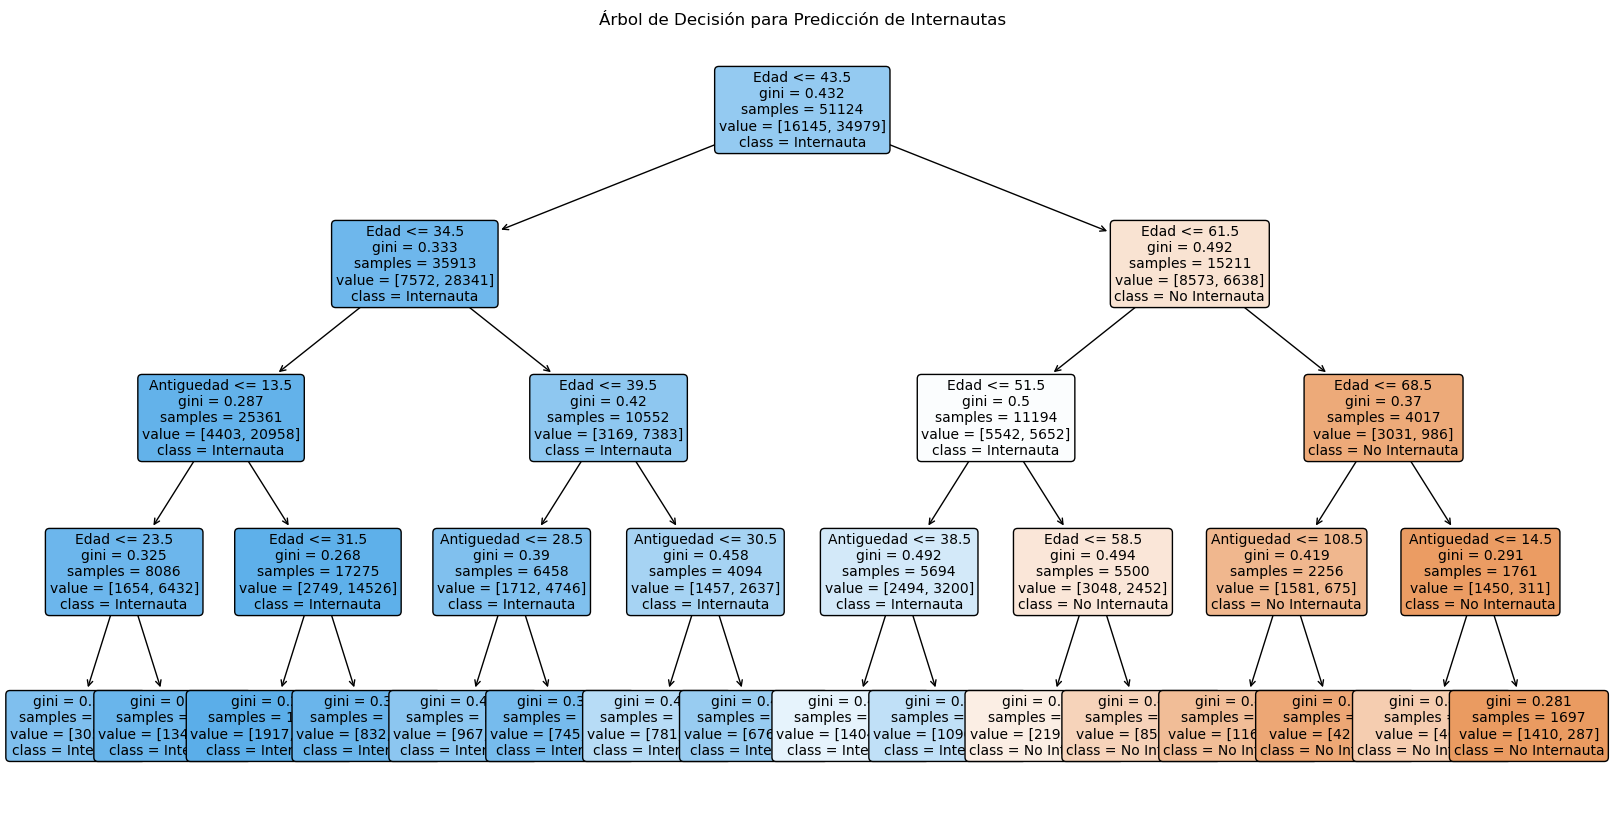

In [238]:
# Create and train the decision tree classifier first
from sklearn.tree import DecisionTreeClassifier

# Create classifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model using your existing X and y data
tree_clf.fit(X, y)

# Then your visualization code
plt.figure(figsize=(20,10))
plot_tree(tree_clf,
          feature_names=X.columns,
          class_names=['No Internauta', 'Internauta'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Árbol de Decisión para Predicción de Internautas')
plt.show()

1. Primera División (Raíz)
* Si Edad <= 43.5 años → tiende a ser Internauta
* Si Edad > 43.5 años → tiende a No Internauta
* Esto tiene sentido ya que las personas más jóvenes suelen ser más digitales
2. Rama Izquierda (Más jóvenes)
* Si Edad <= 34.5 → muy alta probabilidad de ser Internauta
* Considera factores secundarios como:
  * Región_13.0 (probablemente Santiago)
  * Antigüedad como cliente
  * Renta
* Los nodos azules indican mayor proporción de Internautas
3. Rama Derecha (Más adultos)
* Si Edad > 61.5 → fuerte tendencia a No Internauta
* Considera:
  * Renta
  * Región
  * Antigüedad
* Los nodos naranjas indican mayor proporción de No Internautas









Resultados del Modelo:
--------------------------------------------------
Error Cuadrático Medio (MSE): 145,891,831,713.59
Raíz del Error Cuadrático Medio (RMSE): 381,957.89
Coeficiente de Determinación (R²): -0.0517


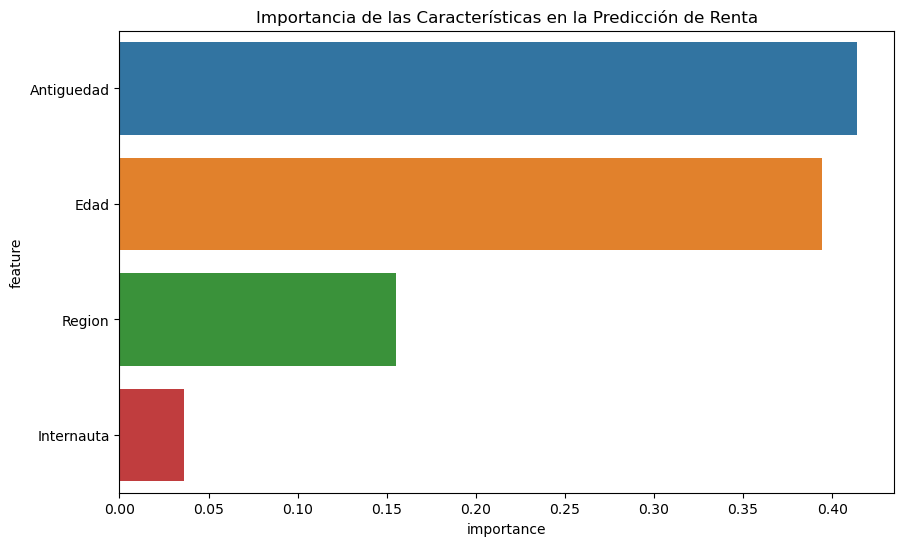


Estadísticas de Renta por Región:
            Renta                  
             mean        std  count
Region                             
1.0     632311.49  356292.12    979
2.0     738478.16  478880.08   1072
3.0     772882.42  881064.91    294
4.0     626995.47  315664.51    890
5.0     601000.26  398382.95   3489
5.2     273667.20       0.00      2
5.6     150000.00        NaN      1
6.0     612256.81  350299.65    718
6.6     355108.00   51731.93      2
7.0     624491.68  339537.84   1331
7.0     351061.80        NaN      1
7.6     398635.80   33232.32      2
7.8     394728.00        NaN      1
8.0     633928.12  331126.76   3768
8.2     482992.00        NaN      1
8.4     288454.50  407934.85      2
8.8     475503.00        NaN      1
9.0     559258.05  330124.02   2144
9.2     561702.00        NaN      1
9.4     952319.00        NaN      1
9.6     458035.00        NaN      1
10.0    605577.07  357771.60   2178
10.2    491631.10   88034.94      2
10.4    433968.60  110689.73 

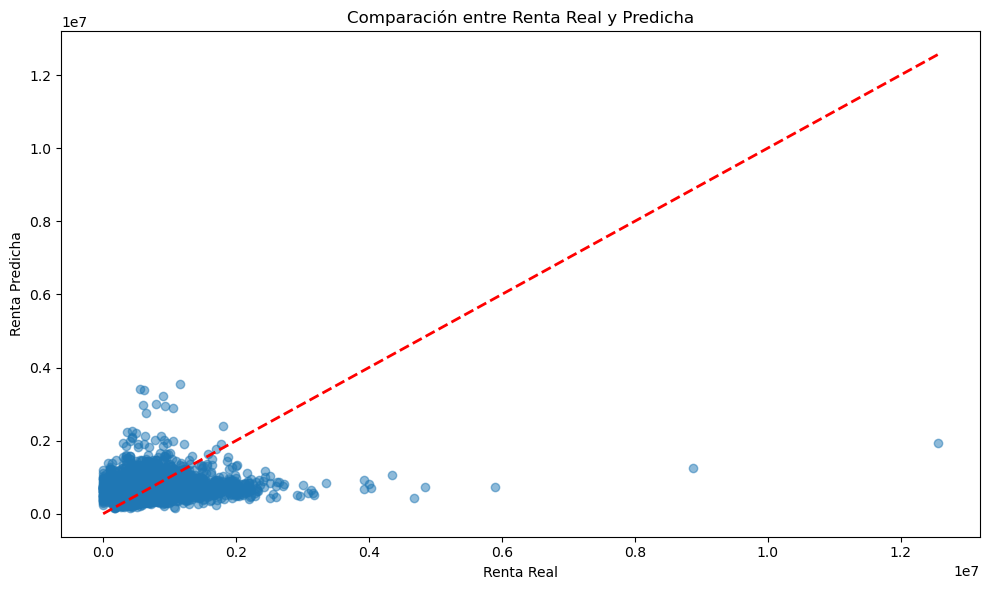

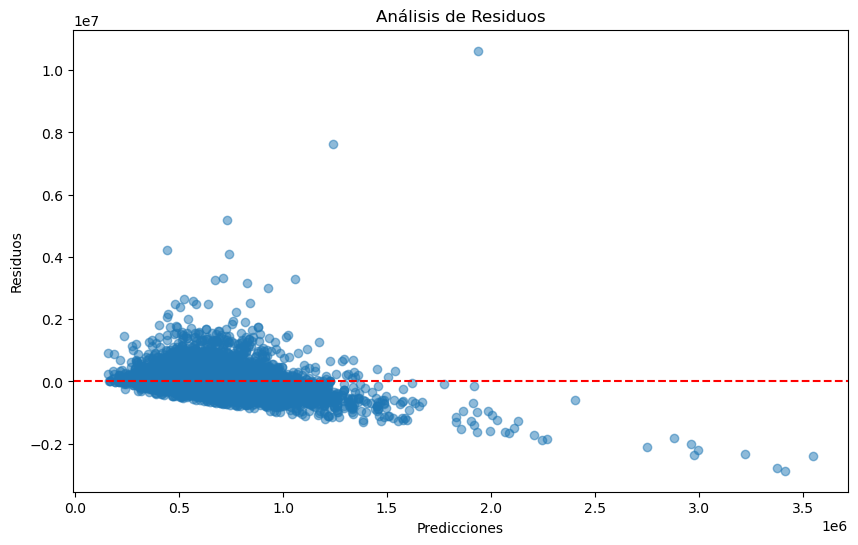

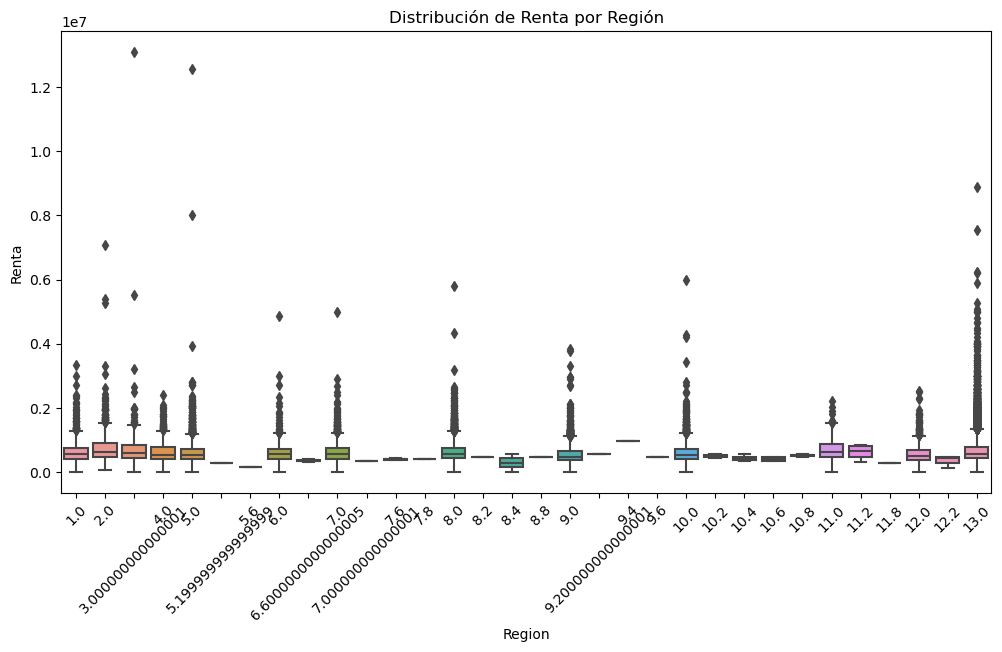

In [239]:
# Modelo de Regresión para analizar la relación entre Renta y Región
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparar los datos
X = df[['Region', 'Edad', 'Antiguedad', 'Internauta']]  # Variables predictoras
y = df['Renta']  # Variable objetivo

# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear y entrenar el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred = rf_model.predict(X_test)

# 5. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nResultados del Modelo:")
print("-" * 50)
print(f"Error Cuadrático Medio (MSE): {mse:,.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:,.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# 6. Visualizar importancia de características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las Características en la Predicción de Renta')
plt.show()

# 7. Análisis por región
renta_region = df.groupby('Region').agg({
    'Renta': ['mean', 'std', 'count']
}).round(2)

print("\nEstadísticas de Renta por Región:")
print(renta_region)

# 8. Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Renta Real')
plt.ylabel('Renta Predicha')
plt.title('Comparación entre Renta Real y Predicha')
plt.tight_layout()
plt.show()

# 9. Análisis de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.show()

# 10. Renta promedio por región con intervalos de confianza
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Renta', data=df)
plt.title('Distribución de Renta por Región')
plt.xticks(rotation=45)
plt.show()

# Conclusión

### Análisis General
Después de evaluar todos los modelos implementados para el Banco Monopoly, hemos identificado diferentes fortalezas y debilidades en cada uno. El objetivo principal era identificar clientes internautas y entender patrones de comportamiento financiero.


### Comparación de Modelos
En el caso de la clasificación de internautas, la Regresión Logística con SMOTE destacó significativamente. Este modelo alcanzó un 80.1% de precisión, superando a sus competidores como Random Forest y KNN, que se quedaron en 73.1%. La diferencia no es solo numérica; la Regresión Logística demostró un mejor equilibrio entre identificar correctamente tanto internautas como no internautas.
Los modelos de árbol de decisión, aunque más fáciles de interpretar, no alcanzaron el mismo nivel de rendimiento. Por su parte, el Random Forest mostró buena capacidad para manejar relaciones complejas en los datos, pero no superó la eficiencia de la Regresión Logística mejorada con SMOTE.

La elección de este modelo como el mejor se basa en varios factores:
- Rendimiento Superior
- Tiene la mejor precisión (80.1%), también muestra un excelente recall de 0.906, escencial para identificar correctamente a los internautas potenciales.
El balance entre precisión y recall es particularmente importante para el banco, ya que permite minimizar tanto los falsos positivos como los negativos.


In [240]:
# Guardar modelo y scaler
import joblib

# Guardar el modelo de regresión logística
joblib.dump(model, 'modelo_internauta_logreg.pkl')
# Guardar el scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']